# (3주차) 9월15일 
> 라인플랏과 산점도, 여러그림 그리기, 앤스콤의 플랏

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

### 강의영상 

> youtube: https://youtube.com/playlist?list=PLQqh36zP38-wEacsi-EaRqyPiz5jvidBx

`-` (1/4) 라인플랏과 산점도

`-` (2/4) 여러그림 그리기

`-` (3/4) 앤스콤의 플랏 

`-` (4/4) 앤스콤의 플랏, 과제설명 

### 라인플랏을 그리는 방법 

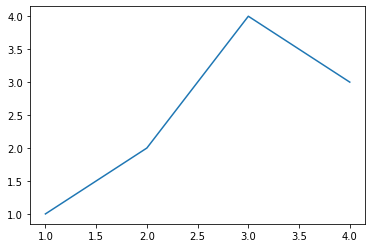

In [5]:
import matplotlib.pyplot as plt 
x=[1,2,3,4]
y=[1,2,4,3]
plt.plot(x,y)

### matplotlib에서 산점도와 라인플랏 그리기 (종합)

`-` plt.plot()를 사용하면 산점도와 라인플랏을 다양한 조합으로 쉽고 편리하게 그릴수 있음 

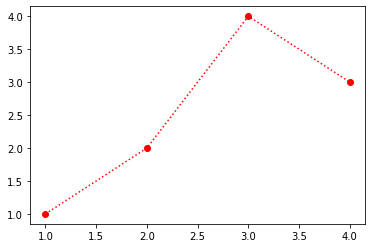

In [79]:
x=[1,2,3,4]
y=[1,2,4,3]
plt.plot(x,y,'o:r') # 20정도의 점의 모양, 4개의 선의모양, 8개의 색깔 

### 여러그림을 그리기 

#### (1) 겹쳐그리기 

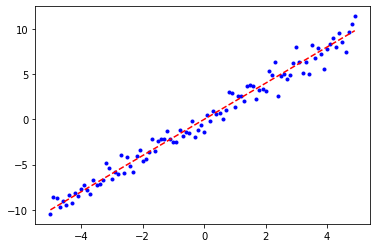

In [96]:
import numpy as np
x=np.arange(-5,5,0.1)
y=2*x+np.random.normal(loc=0,scale=1,size=100)
plt.plot(x,y,'.b')
plt.plot(x,2*x,'--r')

#### (2) 따로그리기 - subplots

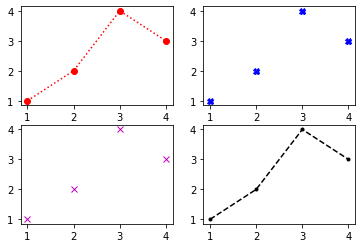

In [105]:
x=[1,2,3,4]
y=[1,2,4,3]
_, axs = plt.subplots(2,2)
axs[0,0].plot(x,y,'o:r') 
axs[0,1].plot(x,y,'Xb') 
axs[1,0].plot(x,y,'xm') 
axs[1,1].plot(x,y,'.--k') 

In [108]:
plt.subplots??

Signature:
plt.subplots(
    nrows=1,
    ncols=1,
    *,
    sharex=False,
    sharey=False,
    squeeze=True,
    subplot_kw=None,
    gridspec_kw=None,
    **fig_kw,
)
Source:   
@_api.make_keyword_only("3.3", "sharex")
def subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True,
             subplot_kw=None, gridspec_kw=None, **fig_kw):
    """
    Create a figure and a set of subplots.

    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.

    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.

    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:

        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': ea

- subplots의 리턴값이 (fig,axs) 이 나오게된다. 우리는 뒤의 axs만 관심이 있으므로 앞의 fig는 _로 처리한다. 

#### Anscombe's quartet

`-` 교과서에 나오는 그림임. 

`-` 교훈: 데이터를 분석하기 전에 항상 시각화를 하라. 

In [120]:
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

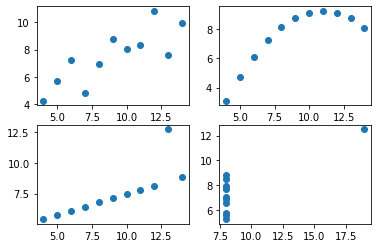

In [123]:
_, axs = plt.subplots(2,2)
axs[0,0].plot(x,y1,'o') 
axs[0,1].plot(x,y2,'o') 
axs[1,0].plot(x,y3,'o')  
axs[1,1].plot(x4,y4,'o') 

`-` 상관계수를 잠깐 복습해보자. 
- 상관계수는 -1 ~ 1 사이의 값을 가진다. (코쉬슈바르츠 부등식을 사용하여 증명가능) 
- 완전한 직선이라면 상관계수가 1 또는 -1이다. 
- 상관계수가 1에 가까우면 양의 상관관계에 있다고 말하고 -1에 가까우면 음의 상관관계에 있다고 말한다. 

`-` 의문: 자료의 모양이 직선모양에 가까우면 상관계수가 큰것이 맞나? 
- $x,y$ 값이 모두 큰 하나의 관측치가 상관계수값을 키울 수 있지 않나? 

`-` 상관계수가 좋은것은 맞나? (=상관계수는 두 변수의 관계를 설명하기에 충분히 적절한 통계량인가?) 

In [126]:
n=len(x) #  
xtilde = (x-np.mean(x)) / (np.std(x)*np.sqrt(n))
y1tilde = (y1-np.mean(y1)) / (np.std(y1)*np.sqrt(n))

In [127]:
sum(xtilde*y1tilde)

0.81642051634484

In [128]:
np.corrcoef(x,y1)

array([[1.        , 0.81642052],
       [0.81642052, 1.        ]])

In [131]:
np.corrcoef([x,y1,y2,y3])

array([[1.        , 0.81642052, 0.81623651, 0.81628674],
       [0.81642052, 1.        , 0.7500054 , 0.46871668],
       [0.81623651, 0.7500054 , 1.        , 0.58791933],
       [0.81628674, 0.46871668, 0.58791933, 1.        ]])

In [132]:
np.corrcoef([x4,y4])

array([[1.        , 0.81652144],
       [0.81652144, 1.        ]])

`-` 위의 4개의 그림에 대한 상관계수는 모두 같다. (0.81652)

`-` 상관계수는 두 변수의 관계를 설명하기에 부적절하다. 
- 상관계수는 1번그림과 같이 두 변수가 선형관계에 있을때 그 정도를 나타내는 통계량일뿐이다. 
- 선형관계가 아닌것처럼 보이는 자료에서는 상관계수를 계산할수는 있겠으나 의미가 없다. 

`-` 교훈2: 기본적인 통계량들은 실제자료를 분석하기에 부적절할수 있다. (=통계량은 적절한 가정이 동반되어야 의미가 있다) 

> note: 통계학자는 (1) 적절한 가정을 수학적인 언어로 정의하고 (2) 그 가정하에서 통계량이 의미있다는 것을 증명해야 한다. (3) 그리고 그 결과를 시각화하여 설득한다. 

### 숙제 

`-` 앤스콤의 플랏을 붉은색을 사용하여 그려보기!